# Non-Cartesian Reconstruction (NCR)

In [1]:
%reset -f
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import os
import imageio
import tempfile

import utils
from demo_ncr import *

In [2]:
vmin = 0
vmax = 0.015
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

### Load results.

In [3]:
ref_time  = np.load("results/ncr/reference/time.npy")
reference = np.load("results/ncr/reference/iter_%03d.npy" % (ref_time.size - 1))

In [4]:
fista_params = utils.quality_filter("ncr", "fista", eps=None, verbose=True)
eps = np.load("results/ncr/fista_%3.2fx10^%d/err.npy" % fista_params)[1, -1] + 2

Selected best reconstruction parameters.


In [5]:
(fista_params, fista_aha, fista_conv, fista_time) = utils.get_best_case("ncr", "fista", eps=eps)
fista_iter = [np.load("results/ncr/fista_%3.2fx10^%d/iter_%03d.npy" % \
                      tuple(list(fista_params) + [k]), mmap_mode="r") for k in range(fista_conv.size)]

Selected 1 of 15.
CASE: fista_3.42x10^-5 NRMSE: 16.02%


In [6]:
(ifista_params, ifista_aha, ifista_conv, ifista_time) = utils.get_best_case("ncr", "ifista", eps=eps)
ifista_iter = [np.load("results/ncr/ifista_%3.2fx10^%d_%d/iter_%03d.npy" % \
                       tuple(list(ifista_params) + [k])) for k in range(ifista_conv.size)]

Selected 26 of 75.
CASE: ifista_3.90x10^-4_10 NRMSE: 17.88%
CASE: ifista_2.60x10^-4_8 NRMSE: 16.18%
CASE: ifista_2.60x10^-4_10 NRMSE: 15.35%
CASE: ifista_1.73x10^-4_4 NRMSE: 17.59%
CASE: ifista_1.73x10^-4_5 NRMSE: 16.04%
CASE: ifista_1.73x10^-4_8 NRMSE: 14.28%
CASE: ifista_1.73x10^-4_10 NRMSE: 13.99%
CASE: ifista_1.15x10^-4_4 NRMSE: 14.92%
CASE: ifista_1.15x10^-4_5 NRMSE: 14.16%
CASE: ifista_1.15x10^-4_8 NRMSE: 13.59%
CASE: ifista_1.15x10^-4_10 NRMSE: 13.58%
CASE: ifista_7.70x10^-5_2 NRMSE: 16.83%
CASE: ifista_7.70x10^-5_4 NRMSE: 13.87%
CASE: ifista_7.70x10^-5_5 NRMSE: 13.72%
CASE: ifista_7.70x10^-5_8 NRMSE: 13.63%
CASE: ifista_7.70x10^-5_10 NRMSE: 13.64%
CASE: ifista_5.13x10^-5_2 NRMSE: 14.61%
CASE: ifista_5.13x10^-5_4 NRMSE: 14.04%
CASE: ifista_5.13x10^-5_5 NRMSE: 14.09%
CASE: ifista_5.13x10^-5_8 NRMSE: 13.94%
CASE: ifista_5.13x10^-5_10 NRMSE: 13.86%
CASE: ifista_3.42x10^-5_2 NRMSE: 14.02%
CASE: ifista_3.42x10^-5_4 NRMSE: 14.71%
CASE: ifista_3.42x10^-5_5 NRMSE: 14.71%
CASE: ifista_3.

In [7]:
(admm_params, admm_aha, admm_conv, admm_time) = utils.get_best_case("ncr", "admm", eps=eps)
admm_iter = [np.load("results/ncr/admm_%3.2fx10^%d_%d/iter_%03d.npy" % \
                     tuple(list(admm_params) + [k])) for k in range(admm_conv.size)]

Selected 6 of 75.
CASE: admm_2.43x10^2_10 NRMSE: 17.05%
CASE: admm_8.10x10^1_8 NRMSE: 16.93%
CASE: admm_8.10x10^1_10 NRMSE: 16.28%
CASE: admm_2.70x10^1_5 NRMSE: 17.51%
CASE: admm_2.70x10^1_8 NRMSE: 17.43%
CASE: admm_2.70x10^1_10 NRMSE: 17.92%


In [8]:
(pfista_params, pfista_aha, pfista_conv, pfista_time) = utils.get_best_case("ncr", "pfista", eps=eps)
pfista_iter = [np.load("results/ncr/pfista_%3.2fx10^%d_%d/iter_%03d.npy" % \
                       tuple(list(pfista_params) + [k])) for k in range(pfista_conv.size)]

Selected 41 of 75.
CASE: pfista_1.97x10^-3_10 NRMSE: 17.54%
CASE: pfista_1.31x10^-3_8 NRMSE: 16.78%
CASE: pfista_1.31x10^-3_10 NRMSE: 14.83%
CASE: pfista_8.77x10^-4_8 NRMSE: 14.53%
CASE: pfista_8.77x10^-4_10 NRMSE: 13.90%
CASE: pfista_5.85x10^-4_5 NRMSE: 16.26%
CASE: pfista_5.85x10^-4_8 NRMSE: 13.89%
CASE: pfista_5.85x10^-4_10 NRMSE: 14.10%
CASE: pfista_3.90x10^-4_4 NRMSE: 15.94%
CASE: pfista_3.90x10^-4_5 NRMSE: 14.34%
CASE: pfista_3.90x10^-4_8 NRMSE: 14.21%
CASE: pfista_3.90x10^-4_10 NRMSE: 14.74%
CASE: pfista_2.60x10^-4_4 NRMSE: 14.24%
CASE: pfista_2.60x10^-4_5 NRMSE: 13.93%
CASE: pfista_2.60x10^-4_8 NRMSE: 14.86%
CASE: pfista_2.60x10^-4_10 NRMSE: 15.44%
CASE: pfista_1.73x10^-4_2 NRMSE: 17.79%
CASE: pfista_1.73x10^-4_4 NRMSE: 13.96%
CASE: pfista_1.73x10^-4_5 NRMSE: 14.33%
CASE: pfista_1.73x10^-4_8 NRMSE: 15.55%
CASE: pfista_1.73x10^-4_10 NRMSE: 16.07%
CASE: pfista_1.15x10^-4_2 NRMSE: 15.13%
CASE: pfista_1.15x10^-4_4 NRMSE: 14.41%
CASE: pfista_1.15x10^-4_5 NRMSE: 14.99%
CASE: pfista_1

## Plots.

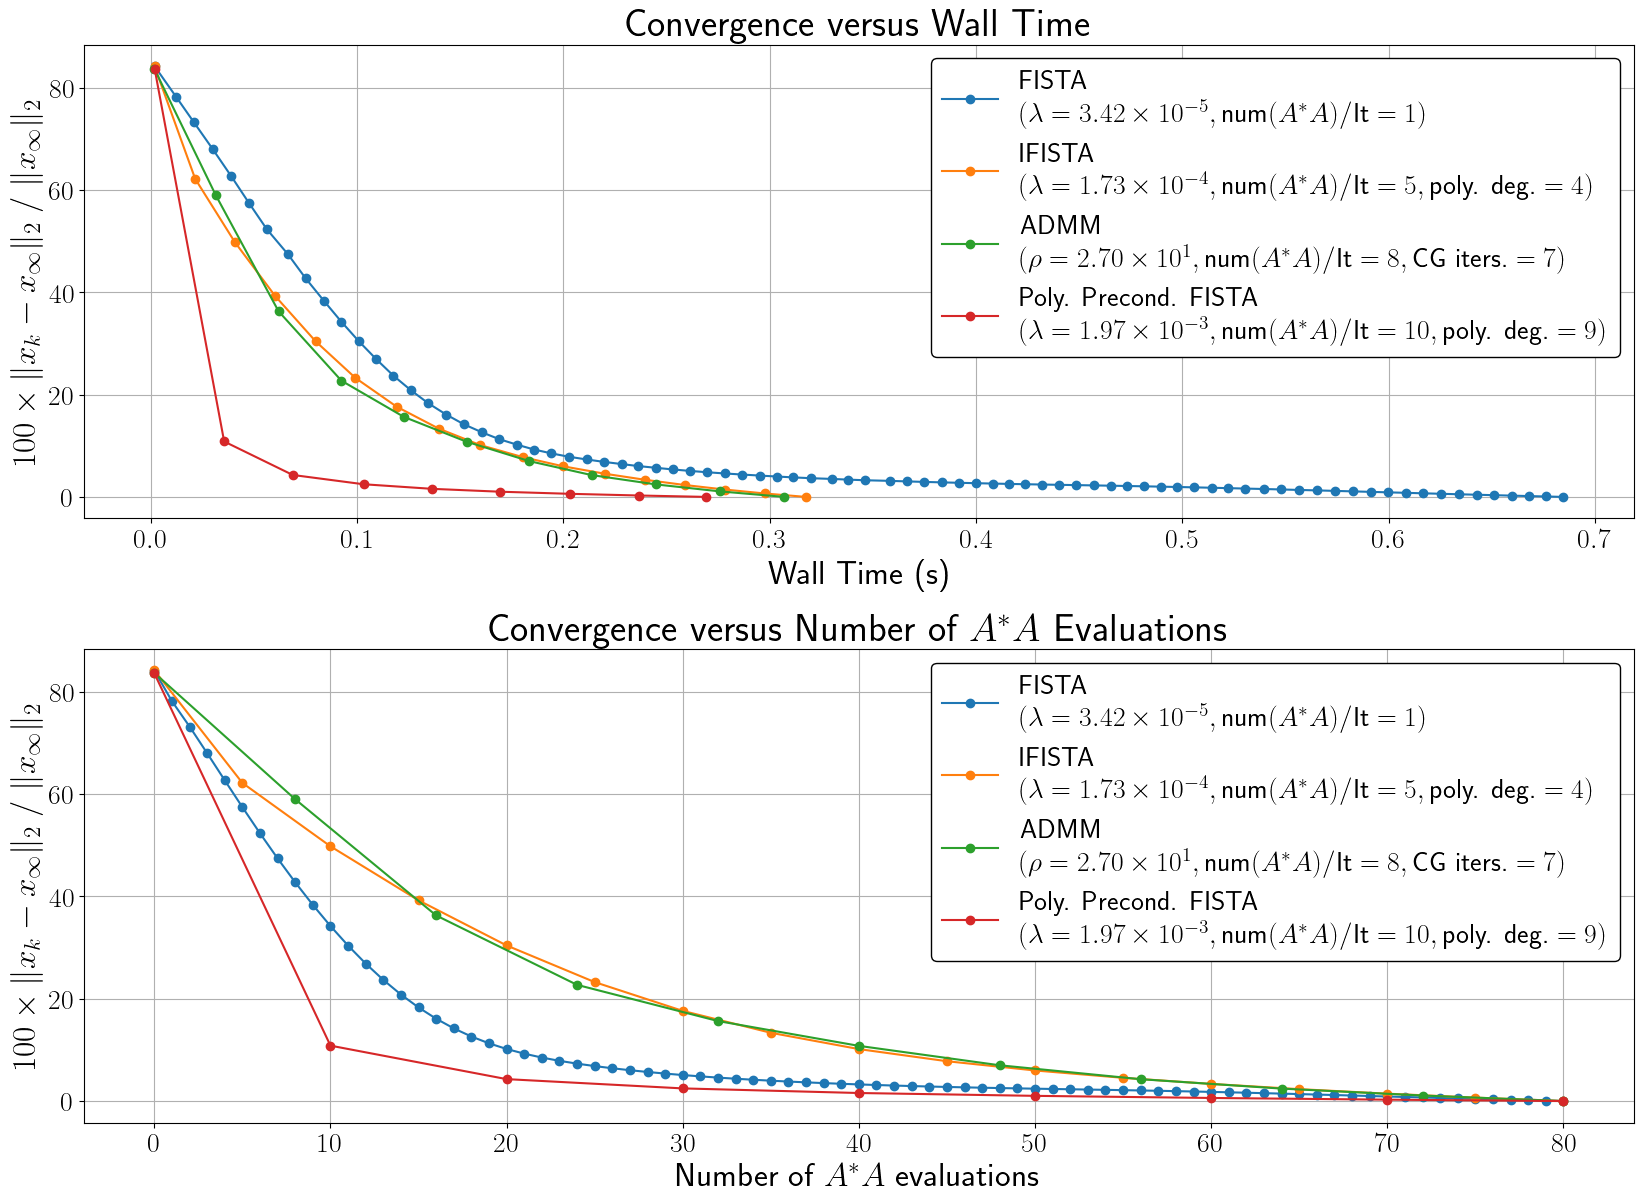

In [9]:
legend = ["FISTA\n$(\lambda=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=1)$"                                         % fista_params,
          "IFISTA\n$(\lambda=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=%d, \\text{poly. deg.}=%d)$"                % (ifista_params + (ifista_params[-1] - 1,)),
          "ADMM\n$(\\rho=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=%d, \\text{CG iters.}=%d)$"                    % (admm_params + (admm_params[-1] - 1,)),
          "Poly. Precond. FISTA\n$(\lambda=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=%d, \\text{poly. deg.}=%d)$" % (pfista_params + (pfista_params[-1] - 1,))]
(fig, axs) = plt.subplots(2, 1, figsize=(20, 14), dpi=100)

axs[0].plot( fista_time,  fista_conv, marker='o')
axs[0].plot(ifista_time, ifista_conv, marker='o')
axs[0].plot(  admm_time,   admm_conv, marker='o')
axs[0].plot(pfista_time, pfista_conv, marker='o')
axs[0].set_xlabel("Wall Time (s)", fontsize=24)
axs[0].set_title("Convergence versus Wall Time", fontsize=28)

axs[1].plot(fista_aha,  fista_conv,  marker='o')
axs[1].plot(ifista_aha, ifista_conv, marker='o')
axs[1].plot(admm_aha,   admm_conv,   marker='o')
axs[1].plot(pfista_aha, pfista_conv, marker='o')
axs[1].set_xlabel("Number of $A^*A$ evaluations", fontsize=24)
axs[1].set_title("Convergence versus Number of $A^*A$ Evaluations", fontsize=28)

#ax = inset_axes(axs[1], width="15%", height="45%", borderpad=40, loc="center left")
#ax.plot(fista_aha,  fista_conv,  marker='o')
#ax.plot(ifista_aha, ifista_conv, marker='o')
#ax.plot(admm_aha,   admm_conv,   marker='o')
#ax.plot(pfista_aha, pfista_conv, marker='o')
#ax.set_xlim([39.5, 80.5])
#ax.set_ylim([-0.25, 10.25])

for ax in axs.ravel():
    ax.set_ylabel("$100 \\times \lVert x_k - x_\infty \\rVert_2 \;/\; \lVert x_\infty \\rVert_2$", fontsize=24)
    ax.legend(legend, ncol=1, fontsize=20, loc="upper right", framealpha=1, edgecolor="black")
    ax.grid()

plt.subplots_adjust(hspace=0.275);

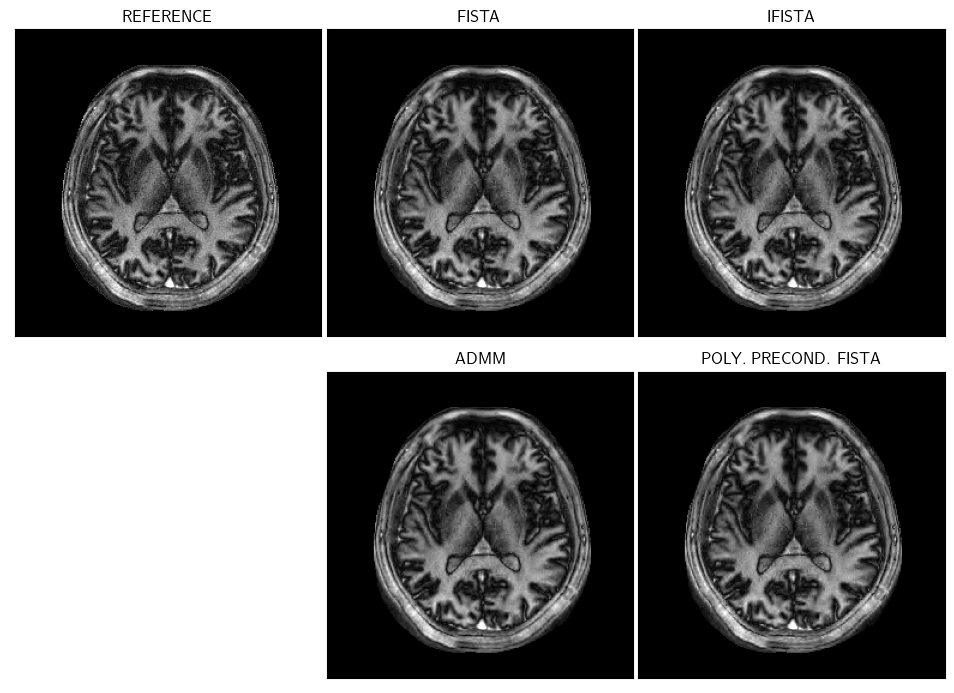

In [10]:
(fig, axs) = plt.subplots(2, 3, figsize=(12, 10), dpi=100)

f = lambda x: x[::-1, :]/np.linalg.norm(x)

axs[0][0].imshow(np.abs(f(reference)),       cmap="gray", vmin=0, vmax=vmax)
axs[0][1].imshow(np.abs(f(fista_iter[-1])),  cmap="gray", vmin=0, vmax=vmax)
axs[0][2].imshow(np.abs(f(ifista_iter[-1])), cmap="gray", vmin=0, vmax=vmax)
axs[1][1].imshow(np.abs(f(admm_iter[-1])),   cmap="gray", vmin=0, vmax=vmax)
axs[1][2].imshow(np.abs(f(pfista_iter[-1])), cmap="gray", vmin=0, vmax=vmax)

axs[0][0].set_title("REFERENCE")
axs[0][1].set_title("FISTA")
axs[0][2].set_title("IFISTA")
axs[1][1].set_title("ADMM")
axs[1][2].set_title("POLY. PRECOND. FISTA")

axs[1][0].remove()

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(wspace=0.0175, hspace=-0.2)

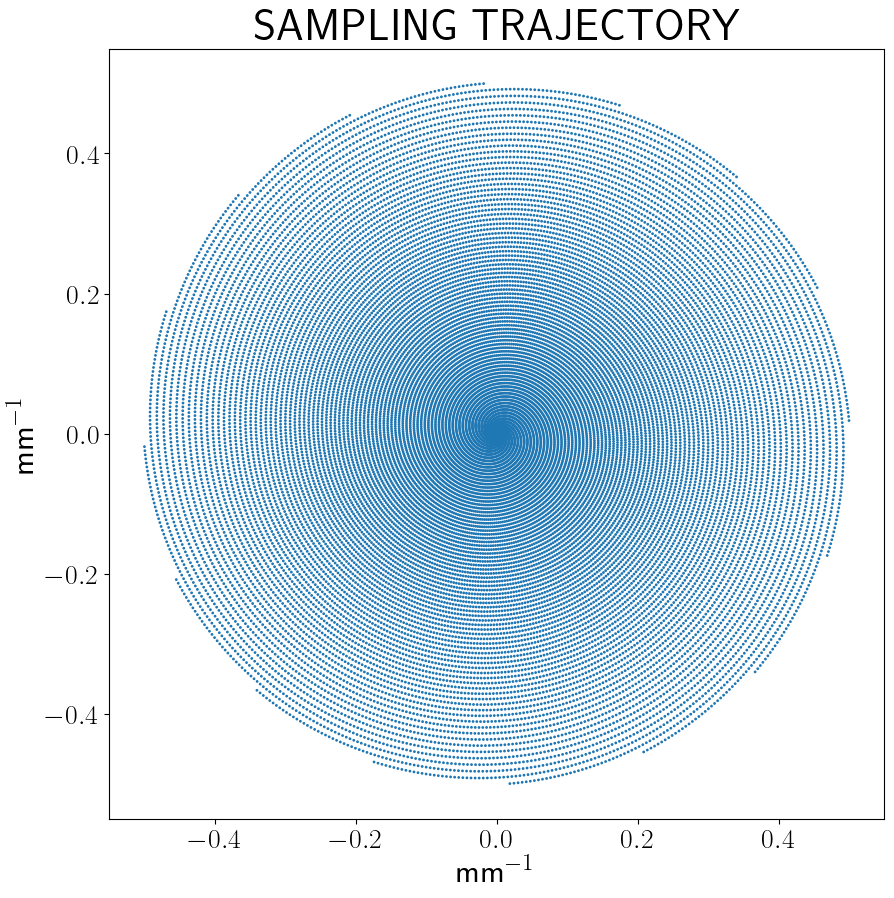

In [11]:
trj = np.load("data/spiral_brain/trj.npy")[::2, ...]/256

(fig, axs) = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
axs.scatter(trj[..., 0], trj[..., 1], s=np.ones_like(trj[..., 0]) * 1)
axs.set_xlabel("$\\text{mm}^{-1}$", fontsize=24)
axs.set_ylabel("$\\text{mm}^{-1}$", fontsize=24)
axs.set_title("SAMPLING TRAJECTORY", fontsize=32);

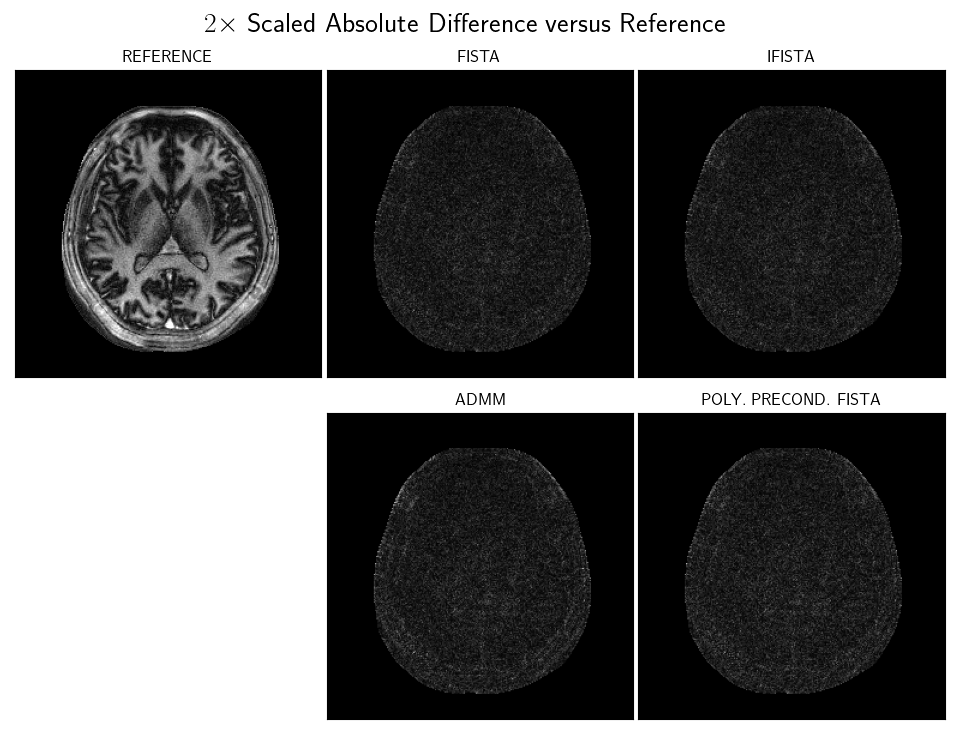

In [12]:
(fig, axs) = plt.subplots(2, 3, figsize=(12, 10), dpi=100)

f = lambda x: x[::-1, :]/np.linalg.norm(x)

axs[0][0].imshow(np.abs(f(reference)),                          cmap="gray", vmin=0, vmax=vmax)
axs[0][1].imshow(np.abs(f(fista_iter[-1])  - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax)
axs[0][2].imshow(np.abs(f(ifista_iter[-1]) - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax)

axs[1][1].imshow(np.abs(f(admm_iter[-1])   - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax)
axs[1][2].imshow(np.abs(f(pfista_iter[-1]) - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax)

axs[0][0].set_title("REFERENCE")
axs[0][1].set_title("FISTA")
axs[0][2].set_title("IFISTA")
axs[1][1].set_title("ADMM")
axs[1][2].set_title("POLY. PRECOND. FISTA")

axs[1][0].remove()

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(wspace=0.0175, hspace=-0.2)
plt.suptitle(r"$2 \times$ Scaled Absolute Difference versus Reference", fontsize=20, y=0.88);

## Video.

In [13]:
with tempfile.TemporaryDirectory() as dirpath:
    for k in range(0, len(pfista_iter)):
        
        num_aha = k * pfista_params[-1]
        x = f(fista_iter[num_aha])
        y = f(pfista_iter[k])
        
        (fig, axs) = plt.subplots(1, 2, figsize=(10, 5), dpi=128)
        axs[0].imshow(np.abs(x), vmin=0, vmax=vmax, cmap="gray")
        axs[1].imshow(np.abs(y), vmin=0, vmax=vmax, cmap="gray")

        for ax in axs.ravel():
            ax.set_xticks([])
            ax.set_yticks([])

        plt.subplots_adjust(wspace=0)
        axs[0].set_xlabel("FISTA", fontsize=24)
        axs[1].set_xlabel("Poly. Precond. FISTA", fontsize=24)
        plt.suptitle("num. $A^*A$: %d" % (num_aha),
                     fontsize=24, x=0.5155)
        plt.savefig(os.path.join(dirpath, "frame_%03d.png" % (k + 1)))
        plt.close()

    writer = imageio.get_writer('videos/ncr.gif', fps=2)
    for k in range(0, len(pfista_iter)):
        im = imageio.v2.imread(os.path.join(dirpath, "frame_%03d.png" % (k + 1)))
        writer.append_data(im)
    writer.close()

## End of notebook.